Author: Carlos Roberto de Melo
    
Date: 09/04/2020
    
Obj: Create a mask

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import scribbler
import numpy as np

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


Create the path where the mask will be output,

In [3]:
dataset_type = "Data"


dataset_path = af.util.create_path(
    path=workspace_path, folders=["SDP81", dataset_type]
)

First, load the imaging dataset, so that the mask can be plotted over the strong lens image.

In [4]:
pixel_scales = 0.01

image = al.Array.from_fits(hdu=1,
    file_path=f"{dataset_path}/ALMA_resampled.fits", pixel_scales=pixel_scales,
)

In [5]:
#Select and drawn the mask
scribbler = scribbler.Scribbler(image=image.in_2d)

In [6]:
mask = scribbler.show_mask()

In [7]:
mask = al.Mask.manual(mask=np.invert(mask), pixel_scales=pixel_scales)

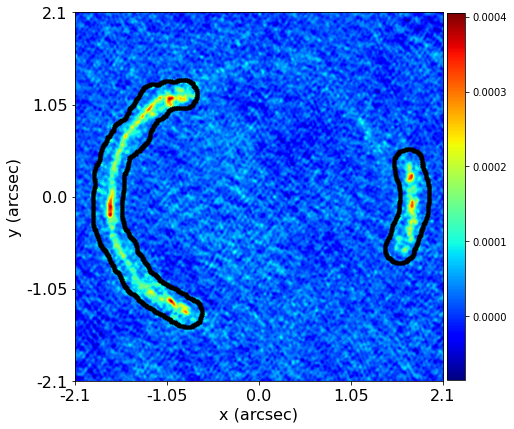

In [8]:
%matplotlib inline
aplt.Array(array=image, mask=mask)

In [9]:
#Save in fits file
mask.output_to_fits(file_path=f"{dataset_path}/mask_gui.fits", overwrite=True)

Now we load the mask and data to see how it works.

In [10]:
#Reading data
from os import path


imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "ALMA_resampled.fits"),
    noise_map_path=path.join(dataset_path, "ALMA_rms_noise_map.fits"),
    psf_path=path.join(dataset_path, "alma_psf.fits"),
    pixel_scales=0.01,
    image_hdu=1, noise_map_hdu=1
)


In [11]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}/mask_gui.fits", hdu=0, pixel_scales=pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

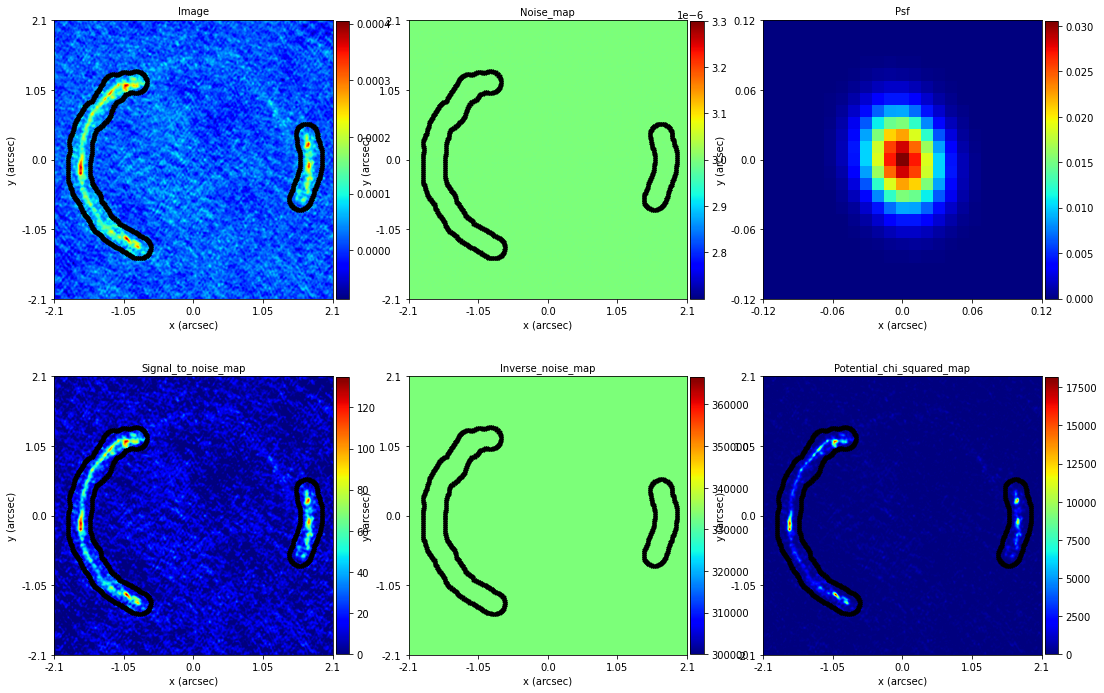

In [12]:
%matplotlib inline
#Plot

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),
)

In [13]:
masked_imaging.grid.shape

(16839, 2)